# Одномерная линейная регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class SimpleLinearRegression:
    #
    def fit(self, X, Y):
        s12 = s21 = np.mean(X)
        s11 = np.mean(X*X)
        s22 = 1
        y1 = np.mean(X*Y)
        y2 = np.mean(Y)
        d = s11*s22 - s12*s21
        assert d != 0
        a = (s22*Y1 - s12*Y2) / d
        b = (s11*Y2 - s21*Y1) / d
        self.a = a
        self.b = b
    #
    def evaluate(self, X):
        return self.a * X + self.b

class WSimpleLinearRegression:
    #
    def fit(self, X, Y, W):
        s12 = s21 = (W*X).mean()
        s11 = (W*X*X).mean()
        s22 = W.sum()
        y1 = np.mean(W*X*Y)
        y2 = np.mean(W*Y)
        d = s11*s22 - s12*s21
        assert d != 0
        a = (s22*Y1 - s12*Y2) / d
        b = (s11*Y2 - s21*Y1) / d
        self.a = a
        self.b = b
    #
    def evaluate(self, X):
        return self.a * X + self.b


Рассмотрим приближенную линейную функцию $y=2x-1+\varepsilon(x)$. 

Задаем случайный массив $X$ значений на отрезке $[-1,1)$:

In [7]:
N = 100
X = 2*np.random.random(N) - 1

In [8]:
Y0 = 2 * X -1

Добавим случайную ошибку со значениями $[-0.5, 0.5)$:

In [9]:
E = (2*np.random.random(N) - 1) * 0.5 
Y = Y0 + E

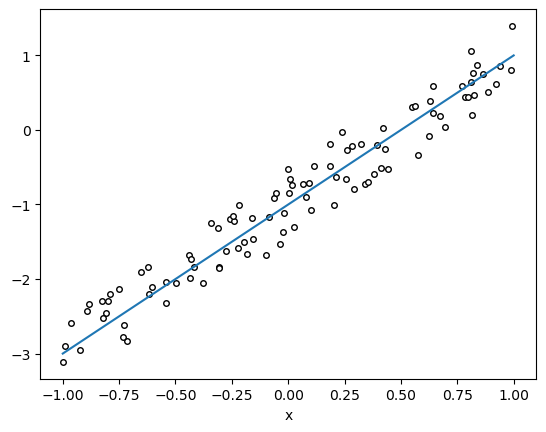

In [10]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot([-1,1], [-3,1])
plt.xlabel('x')
plt.xlabel('y')
plt.show()

In [11]:
slr = SimpleLinearRegression()

In [12]:
slr.fit(X, Y)
print(slr.a, slr.b)

1.8882248503382177 -0.9819260141482462


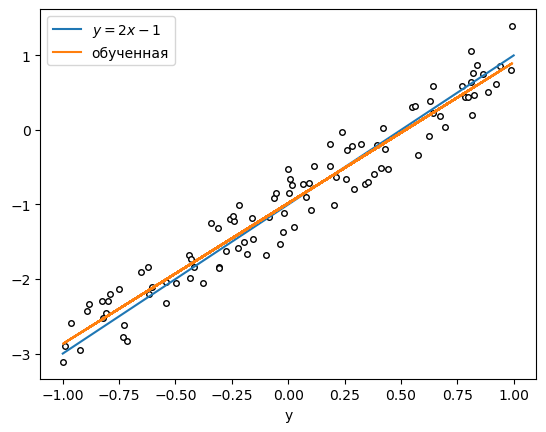

In [13]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot([-1,1], [-3,1], label=r'$y=2x-1$')
plt.xlabel('x')
plt.xlabel('y')
plt.plot(X, slr.evaluate(X), label='обученная')
plt.legend()
plt.show()

In [14]:
Yp = slr.evaluate(X)
E = abs(Y - Yp)

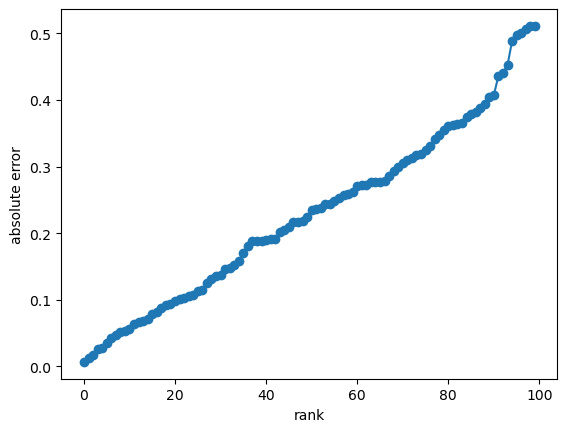

In [17]:
plt.plot(sorted(E), marker='o')
plt.xlabel('rank')
plt.ylabel('absolute error')
plt.show()

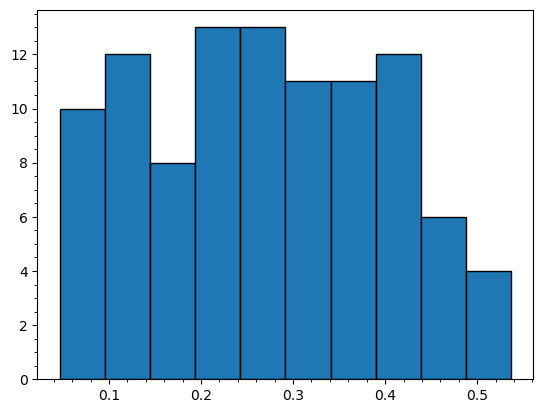

In [56]:
plt.hist(E, bins=10, edgecolor='k')
plt.minorticks_on()
plt.show()

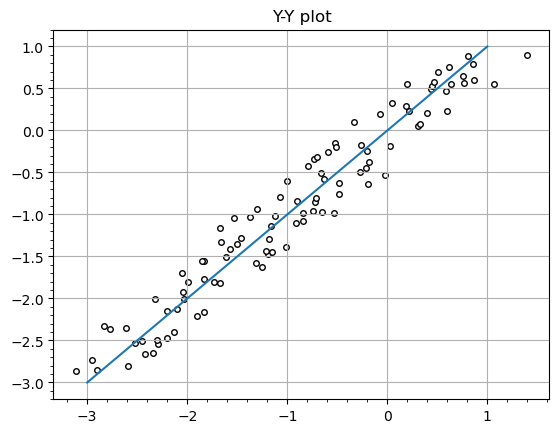

In [24]:
plt.title('Y-Y plot')
plt.scatter(Y, Yp, s=16, c='w', edgecolors='k')
plt.plot([-3,1], [-3,1])
plt.minorticks_on()
plt.grid(1)
plt.show()

In [25]:
df = pd.read_csv("data/mammals.csv", sep=',')
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,id,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5
...,...,...,...
57,Brazilian tapir,160.000,169.0
58,Tenrec,0.900,2.6
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5


In [26]:
body = df["body"].values
brain = df["brain"].values

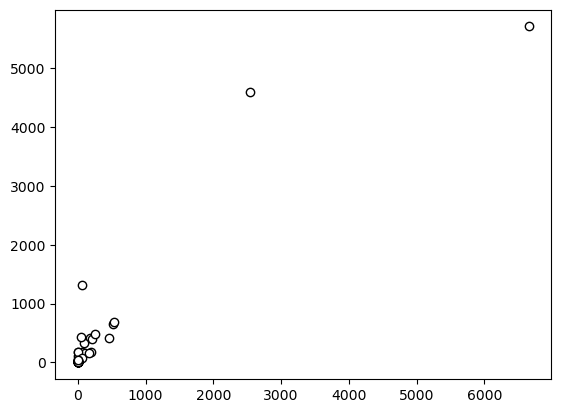

In [27]:
plt.scatter(body, brain, s=36, c='w', edgecolors='k')
plt.show()

In [28]:
body_log = np.log(body)
brain_log = np.log(brain)

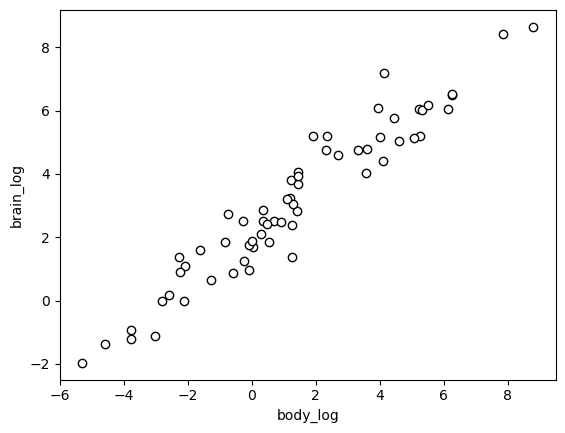

In [29]:
plt.scatter(body_log, brain_log, s=36, c='w', edgecolors='k')
plt.xlabel('body_log')
plt.ylabel('brain_log')
plt.show()